In [1]:
import pandas as pd
import zipfile 
import glob, os
import numpy as np
import pylab as pl
import json
import urllib.request
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ll84_2011 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84__2011_.csv')
ll84_2012 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84__2012_.csv')
ll84_2013 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')
ll84_2014 = pd.read_csv('Energy_and_Water_Data_Disclosure_for_Local_Law__2014_.csv')

In [3]:
print(ll84_2011.columns)
print(ll84_2012.columns)
print(ll84_2013.columns)
print(ll84_2014.columns)

Index(['BBL', 'Street Number', 'Street Name', 'Borough', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI',
       'Weather Normalized Source EUI', 'Water per Square Foot',
       'ENERGY STAR Score', 'GHG', 'Reported Building Square Footage',
       'Reported Facility Type', 'Number of Buildings', 'Reported BINs'],
      dtype='object')
Index(['BBL', 'Street Number', 'Street Name', 'Borough', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Indoor Water Intensity (All Water Sources)(gal/ft2)',
       'Reported Water Method', 'ENERGY STAR Score',
       'Total GHG Emissions(MtCO2e)',
       'Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'Number of Buildings',
       'Reported BINs'],
      dtype='object')
Index(['Record Number', 'NYC Borough, Block, and Lot (BBL)',
       'Co-reported BBL Status', 'BBLs Co-reported',
       'Repor

In [4]:
print("******2011******")
print(len(ll84_2011))
print(len(ll84_2011[ ~isnan(ll84_2011['Site EUI']) ] ))


print("******2012******")
print(len(ll84_2012))
print(len(ll84_2012[ ~isnan(ll84_2012['Site EUI(kBtu/ft2)']) ] ))

print("******2013******")
print(len(ll84_2013))
print(len(ll84_2013[ ll84_2013['Site EUI(kBtu/ft2)'] != nan ] ))

print("******2014******")
print(len(ll84_2014))
print(len(ll84_2014[ ll84_2014['Site EUI(kBtu/ft2)'] != nan ] ))




******2011******
4081
2319
******2012******
14112
11074
******2013******
16170
16170
******2014******
13974
13974


In [5]:
# ll84_2011[ ~isnan(ll84_2011['Site EUI']) ]['Site EUI']

In [6]:
mask = ( ll84_2011['Reported BINs'] != nan ) & ( ~isnan(ll84_2011['Site EUI']) & (ll84_2011['Reported Facility Type'] == 'Multifamily Housing'))
buildings2011 = ll84_2011[ mask ]

In [7]:
buildings2011[['Site EUI']].sum()

Site EUI    71030.9
dtype: float64

In [8]:
buildings2011.head()

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI,Weather Normalized Source EUI,Water per Square Foot,ENERGY STAR Score,GHG,Reported Building Square Footage,Reported Facility Type,Number of Buildings,Reported BINs
16,1000160220,450,NORTH END AVENUE,MANHATTAN,10282,Yes,589,88.2,177.8,NaN,NaN,1167.31,188216,Multifamily Housing,1,1085459
154,1001720020,76,LAFAYETTE STREET,MANHATTAN,10013,Yes,1729,81.1,114.1,NaN,NaN,1942.97,317464,Multifamily Housing,1,1001870
155,1001750033,365,BROADWAY,MANHATTAN,10013,Yes,1907,0.0,0.0,NaN,NaN,NaN,0,Multifamily Housing,1,1001939
166,1001950007,396,BROADWAY,MANHATTAN,10013,Yes,1409,0.5,1.6,NaN,NaN,2.74,61219,Multifamily Housing,1,1002323
171,1001980001,100,BAXTER STREET,MANHATTAN,10013,Yes,2483,30.2,51.4,15.67,NaN,491.21,253009,Multifamily Housing,1,1002364;1084763;1084583


In [9]:
len(buildings2011)

153

In [10]:
pl.histogram(buildings2011['Site EUI'])

(array([152,   0,   0,   0,   0,   0,   0,   0,   0,   1]),
 array([     0.  ,   5848.73,  11697.46,  17546.19,  23394.92,  29243.65,
         35092.38,  40941.11,  46789.84,  52638.57,  58487.3 ]))

In [11]:
ll84_2012.head()

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Indoor Water Intensity (All Water Sources)(gal/ft2),Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,Number of Buildings,Reported BINs
0,1000010010,1,GOVERNORS ISLAND,MANHATTAN,10004,No Record as of 08/1/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
1,1000020002,NaN,MARGINAL STREET,MANHATTAN,10004,No Record as of 08/1/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,1000047501,1,WATER STREET,MANHATTAN,10004,Yes,41,102.0,287.9,16.37,Manual,75,25932.68,2428325,Office,1,1000005
3,1000057501,125,BROAD STREET,MANHATTAN,10004,Yes,3871,119.6,261.5,NaN,Manual,70,11637.42,1338000,Office,1,1000006
4,1003620001,134,AVENUE D,MANHATTAN,10009,Yes,8312,30.3,85.7,1.57,ABS,NaN,13709.99,5207812,Multifamily Housing,7,1077504;1077538;1077539;1077540;1077541;107754...


In [12]:
mask = ( ll84_2012['Reported BINs'] != nan ) & ( ~isnan(ll84_2012['Site EUI(kBtu/ft2)']) & (ll84_2012['Primary Property Type - Self Selected'] == 'Multifamily Housing'))
buildings2012 = ll84_2012[ mask ]

In [13]:
len(buildings2012)

8379

In [14]:
buildings2012

,BBL,Street Number,Street Name,Borough,Zip,Benchmarking Submission,Entry Number,Site EUI(kBtu/ft2),Weather Normalized Source EUI(kBtu/ft2),Indoor Water Intensity (All Water Sources)(gal/ft2),Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,Number of Buildings,Reported BINs
4,1003620001,134,AVENUE D,MANHATTAN,10009,Yes,8312,30.3,85.7,1.57,ABS,NaN,13709.99,5207812,Multifamily Housing,7,1077504;1077538;1077539;1077540;1077541;107754...
16,1011200022,15,WEST 67 STREET,MANHATTAN,10023,Yes,12382,62.4,91.8,8.92,ABS,NaN,330.36,64899,Multifamily Housing,1,1028241
19,1000157502,20,WEST STREET,MANHATTAN,10004,Yes,2843,50.1,141.4,NaN,Manual,NaN,907.90,227463,Multifamily Housing,1,1087243;1000046
20,3068180025,1840,EAST 13 STREET,BROOKLYN,11229,Yes,7792,49.7,82.4,10.56,ABS,NaN,430.36,138476,Multifamily Housing,1,3183899
21,1011860091,316,WEST 79 STREET,MANHATTAN,10024,Yes,1747,60.9,92.3,10.72,ABS,NaN,315.64,63121,Multifamily Housing,1,1031130
22,1000160100,345,SOUTH END AVENUE,MANHATTAN,10280,Yes,10515,67.5,194.5,NaN,Manual,NaN,7481.30,1368917,Multifamily Housing,6,1083378; 1083373; 1083374; 1083375; 1083376; 1...
25,1000160180,20,RIVER TERRACE,MANHATTAN,10007,Yes,203,112.4,197.7,30.54,Manual,NaN,2633.83,356786,Multifamily Housing,1,1086174
26,1000160185,211,NORTH END AVENUE,MANHATTAN,10282,Yes,202,96.3,160.3,36.28,Manual,NaN,1853.76,300000,Multifamily Housing,1,1086547
27,1000160190,22,RIVER TERRACE,MANHATTAN,10282,Yes,517,70.3,134.6,NaN,Manual,NaN,1613.33,331500,Multifamily Housing,1,BIN# 1085929
28,1000160195,325,NORTH END AVENUE,MANHATTAN,10282,Yes,10059,100.5,192.0,43.57,Manual,NaN,2183.42,322505,Multifamily Housing,1,1086507


In [15]:
len(ll84_2012)

14112

In [16]:
mnPluto = pd.read_csv('nyc_pluto_15v1/Mn.csv')
bkPluto = pd.read_csv('nyc_pluto_15v1/BK.csv')
bxPluto = pd.read_csv('nyc_pluto_15v1/BK.csv')
siPluto = pd.read_csv('nyc_pluto_15v1/SI.csv')
qnPluto = pd.read_csv('nyc_pluto_15v1/QN.csv')
print(mnPluto.columns)
mnPluto.head()

/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,7,8,10,27,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (4,6,7,8,10,11,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


Index(['Borough', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010', 'SchoolDist',
       'Council', 'ZipCode', 'FireComp', 'PolicePrct', 'HealthArea', 'Address',
       'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1',
       'Overlay2', 'SPDist1', 'SPDist2', 'LtdHeight', 'AllZoning1',
       'AllZoning2', 'SplitZone', 'BldgClass', 'LandUse', 'Easements',
       'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea', 'ResArea',
       'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea',
       'OtherArea', 'AreaSource', 'NumBldgs', 'NumFloors', 'UnitsRes',
       'UnitsTotal', 'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'Ext',
       'ProxCode', 'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand',
       'AssessTot', 'ExemptLand', 'ExemptTot', 'YearBuilt', 'BuiltCode',
       'YearAlter1', 'YearAlter2', 'HistDist', 'Landmark', 'BuiltFAR',
       'ResidFAR', 'CommFAR', 'FacilFAR', 'BoroCode', 'BBL', 'CondoNo',
       'Tract2010', 'XCoord', 'YCoord', 'ZoneMa

/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (6,7,10,11,50,52,53,77,79) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,Borough,Block,Lot,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,FireComp,...,YCoord,ZoneMap,ZMCode,Sanborn,TaxMap,EDesigNum,APPBBL,APPDate,PLUTOMapID,Version
0,MN,1,10,101,5,1018,2,1,10004,E007,...,190225,16a,Y,199 999,10101,,0,,1,15v1
1,MN,1,101,101,1,1001,2,1,10004,E007,...,190636,16a,Y,199 999,10101,,0,,1,15v1
2,MN,1,201,101,1,1000,2,1,10004,E007,...,193648,12b,,199 999,10101,,0,,1,15v1
3,MN,1,301,101,,,2,1,10004,E007,...,,12b,,199 999,10101,,0,,4,15v1
4,MN,1,401,101,,,2,1,10004,E007,...,,12b,,1 99 999,10101,,0,,4,15v1


In [17]:
len(mnPluto)

43231

In [18]:
mnBuildings2012 = pd.merge(buildings2012,mnPluto,on='BBL')
len(mnBuildings2012)

3307

In [19]:
bkBuildings2012 = pd.merge(buildings2012,bkPluto,on='BBL')
len(bkBuildings2012)

1651

In [20]:
bxBuildings2012 = pd.merge(buildings2012,bxPluto,on='BBL')
len(bxBuildings2012)

1651

In [21]:
qnBuildings2012 = pd.merge(buildings2012,qnPluto,on='BBL')
len(qnBuildings2012)

1632

In [22]:
siBuildings2012 = pd.merge(buildings2012,siPluto,on='BBL')
len(siBuildings2012)

98

In [23]:
print(mnBuildings2012.columns)
mnBuildings2012.loc[0]

Index(['BBL', 'Street Number', 'Street Name', 'Borough_x', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Indoor Water Intensity (All Water Sources)(gal/ft2)',
       'Reported Water Method', 'ENERGY STAR Score',
       'Total GHG Emissions(MtCO2e)',
       'Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'Number of Buildings',
       'Reported BINs', 'Borough_y', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010',
       'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthArea', 'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3',
       'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'LtdHeight',
       'AllZoning1', 'AllZoning2', 'SplitZone', 'BldgClass', 'LandUse',
       'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea',
       'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea',
       

BBL                                                                                           1003620001
Street Number                                                                                        134
Street Name                                                                                     AVENUE D
Borough_x                                                                                      MANHATTAN
Zip                                                                                                10009
Benchmarking Submission                                                                              Yes
Entry Number                                                                                        8312
Site EUI(kBtu/ft2)                                                                                  30.3
Weather Normalized Source EUI(kBtu/ft2)                                                             85.7
Indoor Water Intensity (All Water Sources)(gal/ft2)    

In [24]:
mnBuildings2012['Site EUI(kBtu/ft2)'].describe()

count     3307.000000
mean       592.650076
std       5235.394166
min          0.000000
25%         61.400000
50%         75.100000
75%         92.650000
max      92295.500000
Name: Site EUI(kBtu/ft2), dtype: float64

In [25]:
mnBuildings2012['totalEUI'] = mnBuildings2012['Site EUI(kBtu/ft2)'] * mnBuildings2012['Property Floor Area (Buildngs and Parking)(ft2)']

In [26]:
totalEUI = mnBuildings2012[mnBuildings2012.totalEUI<2*10e6].totalEUI.tolist()

In [27]:
totalEUI = sorted(totalEUI)

(array([  19.,    4.,   18.,   23.,   23.,   20.,   29.,   49.,   69.,
         103.,  122.,  137.,  151.,  140.,  132.,  122.,  134.,  125.,
         116.,   77.,   91.,   82.,   65.,   68.,   63.,   54.,   52.,
          65.,   49.,   38.,   52.,   29.,   34.,   33.,   27.,   31.,
          21.,   20.,   29.,   30.,   32.,   18.,   13.,   20.,   14.,
          16.,   23.,   20.,   19.,   14.]),
 array([        0.   ,    399974.784,    799949.568,   1199924.352,
          1599899.136,   1999873.92 ,   2399848.704,   2799823.488,
          3199798.272,   3599773.056,   3999747.84 ,   4399722.624,
          4799697.408,   5199672.192,   5599646.976,   5999621.76 ,
          6399596.544,   6799571.328,   7199546.112,   7599520.896,
          7999495.68 ,   8399470.464,   8799445.248,   9199420.032,
          9599394.816,   9999369.6  ,  10399344.384,  10799319.168,
         11199293.952,  11599268.736,  11999243.52 ,  12399218.304,
         12799193.088,  13199167.872,  13599142.656,  13

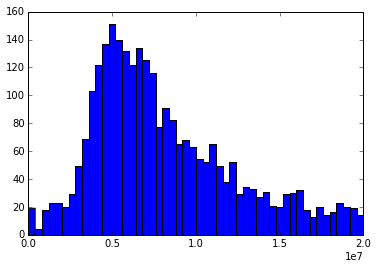

In [28]:
# plt.ylim(0,1e7)
plt.hist(totalEUI, 50)

In [29]:
siteEUI = mnBuildings2012[mnBuildings2012['Site EUI(kBtu/ft2)']<300]['Site EUI(kBtu/ft2)'].tolist()
print(len(siteEUI))
# plt.hist(siteEUI,50);

3263


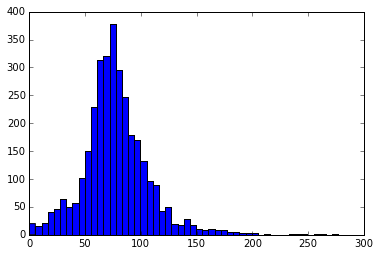

In [30]:
plt.hist(siteEUI,50);

In [31]:
print(mnBuildings2012.columns)

Index(['BBL', 'Street Number', 'Street Name', 'Borough_x', 'Zip',
       'Benchmarking Submission', 'Entry Number', 'Site EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)',
       'Indoor Water Intensity (All Water Sources)(gal/ft2)',
       'Reported Water Method', 'ENERGY STAR Score',
       'Total GHG Emissions(MtCO2e)',
       'Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'Number of Buildings',
       'Reported BINs', 'Borough_y', 'Block', 'Lot', 'CD', 'CT2010', 'CB2010',
       'SchoolDist', 'Council', 'ZipCode', 'FireComp', 'PolicePrct',
       'HealthArea', 'Address', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3',
       'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'LtdHeight',
       'AllZoning1', 'AllZoning2', 'SplitZone', 'BldgClass', 'LandUse',
       'Easements', 'OwnerType', 'OwnerName', 'LotArea', 'BldgArea', 'ComArea',
       'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea', 'StrgeArea',
       

In [32]:
mnBuildings2012En = mnBuildings2012[mnBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CB2010', 'CT2010'
                                    ,'Indoor Water Intensity (All Water Sources)(gal/ft2)'
                                    , 'ProxCode', 'LtdHeight', 'HistDist'
                                    , 'BldgArea', 'ComArea', 'OfficeArea', 'RetailArea', 
                                    'GarageArea', 'StrgeArea','FactryArea', 'OtherArea']]

In [33]:
mnBuildings2012En = mnBuildings2012En.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                 ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

In [34]:
mnBuildings2012En['totalEUI'] = mnBuildings2012En.siteEUI * mnBuildings2012En.floorArea

In [35]:
mnBuildings2012EnInc['age20'] = mnBuildings2012En['YearBuilt'] > 1995
mnBuildings2012EnInc['age40'] = (mnBuildings2012En['YearBuilt'] > 1975) & ( mnBuildings2012En['YearBuilt'] < 1995)
mnBuildings2012EnInc['age60'] = (mnBuildings2012En['YearBuilt'] > 1955) & (mnBuildings2012En['YearBuilt'] < 1975)
mnBuildings2012EnInc['age60ab'] = mnBuildings2012En['YearBuilt'] < 1955

NameError: name 'mnBuildings2012EnInc' is not defined

In [933]:
income = pd.read_csv('income.csv')

In [934]:
import statsmodels.formula.api as smf

In [935]:
# model1 = smf.ols( formula= 'siteEUI ~ YearBuilt + CommFAR + UnitsRes + UnitsTotal + AssessTot', data= mnBuildings2012En).fit()
# model1.summary()

In [936]:
income.ctlabel = income.ctlabel.astype(float).astype(int)
incomed = income[['ctlabel', 'median_household_income']].set_index('ctlabel').to_dict()
incomed = incomed['median_household_income']

In [937]:
mnBuildings2012En['nonRes'] = mnBuildings2012En.floorArea.astype(float) -  mnBuildings2012En.ResArea.astype(float)

In [938]:
mnBuildings2012En["CT2010"] = mnBuildings2012En["CT2010"].astype(float).astype(int)

In [939]:
mnBuildings2012En['income'] = mnBuildings2012En["CT2010"].map(incomed.get)

In [940]:
mnBuildings2012En = mnBuildings2012En[mnBuildings2012En.income>0]

In [941]:
mnBuildings2012En['age20'] = mnBuildings2012En['YearBuilt'] > 1995
mnBuildings2012En['age40'] = (mnBuildings2012En['YearBuilt'] > 1975) & ( mnBuildings2012En['YearBuilt'] < 1995)
mnBuildings2012En['age60'] = (mnBuildings2012En['YearBuilt'] > 1955) & (mnBuildings2012En['YearBuilt'] < 1975)
mnBuildings2012En['age60ab'] = mnBuildings2012En['YearBuilt'] < 1955

In [942]:
model1 = smf.ols( formula= 'siteEUI ~ I(income/10000) + LtdHeight + NumFloors + floorArea ', data= mnBuildings2012En).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     13.44
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           7.31e-11
Time:                        09:36:51   Log-Likelihood:                -15183.
No. Observations:                3154   AIC:                         3.038e+04
Df Residuals:                    3149   BIC:                         3.041e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             78.8146      1.341     58.761      0.000        76.185    81.444
LtdHeight[T.LH-1A]    -9.7903      3.586     -2.730      0.006       -16.822    -2.758
I(income / 10000)     -0.7161      0.213     -3.356      0.001        -1.134    -0.298
NumFloors              0.2986      0.061      4.885      0.000         0.179     0.419
floorArea          -1.168e-05   2.18e-06     -5.363      0.000     -1.59e-05 -7.41e-06
==============================================================================
Omnibus:                      614.831   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2301.662
Skew:                           0.930   Prob(JB):                         0.00
Kurtosis:                       6.749   Cond. No.                     2.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [946]:
model1 = smf.ols( formula= 'GHG ~ I(AssessTot/10000) + siteEUI + GarageArea + FactryArea+ ComArea + StrgeArea + LtdHeight+ ProxCode+ UnitsTotal  + NumFloors  + age20 + age40 + age60 +I(income/10000)', data= mnBuildings2012En).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     240.2
Date:                Fri, 11 Dec 2015   Prob (F-statistic):               0.00
Time:                        09:38:01   Log-Likelihood:                -25518.
No. Observations:                3139   AIC:                         5.107e+04
Df Residuals:                    3122   BIC:                         5.117e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept             -524.0750     62.648     -8.365      0.000      -646.911  -401.239
LtdHeight[T.LH-1A]     -46.0548    100.150     -0.460      0.646      -242.422   150.312
ProxCode[T.1]          353.2840     45.248      7.808      0.000       264.564   442.004
ProxCode[T.2]          -18.3058     42.298     -0.433      0.665      -101.241    64.630
ProxCode[T.3]          -78.8703     40.879     -1.929      0.054      -159.023     1.282
age20[T.True]         -314.8120     52.783     -5.964      0.000      -418.304  -211.320
age40[T.True]         -248.1803     56.320     -4.407      0.000      -358.609  -137.752
age60[T.True]           44.0149     42.038      1.047      0.295       -38.410   126.439
I(AssessTot / 10000)     0.3227      0.016     20.067      0.000         0.291     0.354
siteEUI                  9.3236      0.493     18.910      0.000         8.357    10.290
GarageArea              -0.0027      0.001     -2.101      0.036        -0.005    -0.000
FactryArea              -0.2323      1.820     -0.128      0.898        -3.800     3.336
ComArea                 -0.0005      0.001     -0.705      0.481        -0.002     0.001
StrgeArea             7.252e-05      0.006      0.012      0.990        -0.012     0.012
UnitsTotal               1.4782      0.102     14.499      0.000         1.278     1.678
NumFloors               15.6270      2.303      6.784      0.000        11.111    20.143
I(income / 10000)      -14.9327      5.963     -2.504      0.012       -26.624    -3.241
==============================================================================
Omnibus:                     3004.642   Durbin-Watson:                   1.316
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           226890.253
Skew:                           4.399   Prob(JB):                         0.00
Kurtosis:                      43.710   Cond. No.                     2.73e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.73e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Index(['Zip Code', 'Population', 'Avg. Income/H/hold'], dtype='object')

In [401]:
mnBuildings2012EnInc['age20'] = mnBuildings2012En['YearBuilt'] > 1995
mnBuildings2012EnInc['age40'] = (mnBuildings2012En['YearBuilt'] > 1975) & ( mnBuildings2012En['YearBuilt'] < 1995)
mnBuildings2012EnInc['age60'] = (mnBuildings2012En['YearBuilt'] > 1955) & (mnBuildings2012En['YearBuilt'] < 1975)
mnBuildings2012EnInc['age60ab'] = mnBuildings2012En['YearBuilt'] < 1955

/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/MSAUSI2015/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [402]:
mnBuildings2012EnIncHigh = mnBuildings2012EnInc[mnBuildings2012EnInc.income>80000]
print(len(mnBuildings2012EnIncHigh))

221


In [403]:
mnBuildings2012EnInc.columns

Index(['siteEUI', 'floorArea', 'ZipCode', 'numBldgs', 'UnitsRes', 'UnitsTotal',
       'YearBuilt', 'LotArea', 'NumFloors', 'ResArea', 'RetailArea',
       'AssessTot', 'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR', 'LotArea',
       'LotFront', 'LotDepth', 'BldgFront', 'GHG', 'totalEUI', 'nonRes',
       'income', 'pop', 'age20', 'age40', 'age60', 'age60ab'],
      dtype='object')

In [771]:
mnBuildings2012EnInc['GHGsqft'] = mnBuildings2012EnInc['GHG']/mnBuildings2012EnInc['floorArea']
print(mnBuildings2012EnInc.GHG.describe())

count     3011.000000
mean      1030.968396
std       1295.388579
min          0.770000
25%        406.405000
50%        611.970000
75%       1137.505000
max      13709.990000
Name: GHG, dtype: float64


In [788]:
model1 = smf.ols( formula= 'GHG ~ I(AssessTot/10000) + siteEUI + GarageArea + FactryArea+ ComArea + StrgeArea + LtdHeight+ ProxCode+ UnitsTotal  + NumFloors  + age20 + age40 + age60 +I(income/10000)', data= mnBuildings2012En).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     378.6
Date:                Fri, 11 Dec 2015   Prob (F-statistic):               0.00
Time:                        09:05:11   Log-Likelihood:                -24898.
No. Observations:                3011   AIC:                         4.981e+04
Df Residuals:                    3003   BIC:                         4.986e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept              596.2259     53.261     11.194      0.000       491.795   700.657
age20[T.True]         -385.2210     59.858     -6.436      0.000      -502.588  -267.854
age40[T.True]         -173.8324     63.832     -2.723      0.007      -298.991   -48.674
age60[T.True]          136.6492     50.159      2.724      0.006        38.300   234.998
I(AssessTot / 10000)     0.3428      0.017     20.588      0.000         0.310     0.375
UnitsTotal               1.3345      0.117     11.369      0.000         1.104     1.565
NumFloors               19.3781      2.741      7.069      0.000        14.003    24.753
I(income / 10000)      -92.3303      9.061    -10.189      0.000      -110.098   -74.563
==============================================================================
Omnibus:                     3031.307   Durbin-Watson:                   1.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           285652.471
Skew:                           4.704   Prob(JB):                         0.00
Kurtosis:                      49.780   Cond. No.                     9.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [410]:
model1 = smf.ols( formula= 'siteEUI ~ income  + NumFloors  + floorArea + age40', data= mnBuildings2012EnInc).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     22.98
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           9.94e-19
Time:                        03:38:45   Log-Likelihood:                -14531.
No. Observations:                3024   AIC:                         2.907e+04
Df Residuals:                    3019   BIC:                         2.910e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        84.1782      1.548     54.373      0.000        81.143    87.214
age40[T.True]     3.5451      1.886      1.879      0.060        -0.154     7.244
income           -0.0002   2.71e-05     -7.070      0.000        -0.000    -0.000
NumFloors         0.3811      0.068      5.606      0.000         0.248     0.514
floorArea     -1.236e-05   1.84e-06     -6.712      0.000      -1.6e-05 -8.75e-06
==============================================================================
Omnibus:                      596.113   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2509.998
Skew:                           0.904   Prob(JB):                         0.00
Kurtosis:                       7.081   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [741]:
bkBuildings2012en = bkBuildings2012[bkBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'CT2010'
                                ,'Indoor Water Intensity (All Water Sources)(gal/ft2)']]

In [742]:
bkBuildings2012en = bkBuildings2012en.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'
                                ,'Indoor Water Intensity (All Water Sources)(gal/ft2)':'water'})

In [743]:
bkBuildings2012en['age20'] = bkBuildings2012en['YearBuilt'] > 1995
bkBuildings2012en['age40'] = (bkBuildings2012en['YearBuilt'] > 1975) & ( bkBuildings2012en['YearBuilt'] < 1995)
bkBuildings2012en['age60'] = (bkBuildings2012en['YearBuilt'] > 1955) & (bkBuildings2012en['YearBuilt'] < 1975)
bkBuildings2012en['age60ab'] = bkBuildings2012en['YearBuilt'] < 1955

In [744]:
bkBuildings2012en['nonRes'] = bkBuildings2012en.floorArea -  bkBuildings2012en.ResArea

In [745]:
bkBuildings2012en["CT2010"] = bkBuildings2012en["CT2010"].astype(float).astype(int)

In [746]:
bkBuildings2012en['income'] = bkBuildings2012en["CT2010"].map(incomed.get)

count    1639.000000
mean       72.922270
std        31.840965
min         0.300000
25%        58.650000
50%        73.500000
75%        87.650000
max       268.800000
Name: siteEUI, dtype: float64
1639


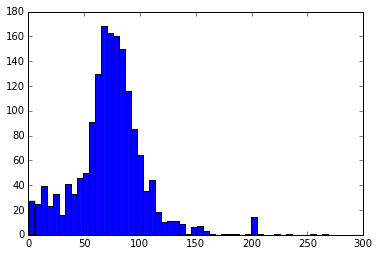

In [747]:
print(bkBuildings2012en.siteEUI.describe())
siteEUI = bkBuildings2012en[bkBuildings2012en.siteEUI<10000].siteEUI.tolist()
print(len(siteEUI))
plt.hist(siteEUI,50);

In [748]:
bkBuildings2012en = bkBuildings2012en[bkBuildings2012en.income>0]
len(bkBuildings2012en)

1589

In [749]:
bkBuildings2012en['above10'] = bkBuildings2012en.NumFloors >10
# bkBuildings2012en['less2'] = bkBuildings2012en.NumFloors <2

In [751]:
model1 = smf.ols( formula= 'siteEUI ~ above10  + floorArea +age20 ', data= bkBuildings2012en).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     62.90
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           2.02e-38
Time:                        07:32:10   Log-Likelihood:                -7674.1
No. Observations:                1589   AIC:                         1.536e+04
Df Residuals:                    1585   BIC:                         1.538e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          70.4172      0.854     82.438      0.000        68.742    72.093
above10[T.True]     5.5078      2.432      2.265      0.024         0.738    10.278
age20[T.True]      -8.8093      2.654     -3.319      0.001       -14.016    -3.603
floorArea        1.282e-05   1.02e-06     12.535      0.000      1.08e-05  1.48e-05
==============================================================================
Omnibus:                      161.331   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              882.590
Skew:                           0.298   Prob(JB):                    2.23e-192
Kurtosis:                       6.602   Cond. No.                     2.91e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [756]:
model2 = smf.ols( formula= 'GHG ~ above10  + floorArea +age20 + age60 ', data= bkBuildings2012en).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GHG   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     5108.
Date:                Fri, 11 Dec 2015   Prob (F-statistic):               0.00
Time:                        08:15:02   Log-Likelihood:                -14353.
No. Observations:                1585   AIC:                         2.872e+04
Df Residuals:                    1580   BIC:                         2.874e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept        -727.4198     64.579    -11.264      0.000      -854.090  -600.749
above10[T.True] -1122.3387    170.394     -6.587      0.000     -1456.561  -788.117
age20[T.True]     466.3079    186.898      2.495      0.013        99.714   832.902
age60[T.True]     298.8066    130.927      2.282      0.023        41.998   555.615
floorArea           0.0099   7.07e-05    139.920      0.000         0.010     0.010
==============================================================================
Omnibus:                     1971.398   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           269626.003
Skew:                          -6.576   Prob(JB):                         0.00
Kurtosis:                      65.527   Cond. No.                     3.10e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [450]:
bxBuildings2012en = bxBuildings2012[bxBuildings2012['Site EUI(kBtu/ft2)']<300][['Site EUI(kBtu/ft2)', 
                                   'Property Floor Area (Buildngs and Parking)(ft2)', 'ZipCode',
                                   'Number of Buildings', 'UnitsRes', 'UnitsTotal', 'YearBuilt',
                                   'LotArea', 'NumFloors', 'ResArea', 'RetailArea', 'AssessTot', 
                                    'CommFAR', 'FacilFAR', 'BuiltFAR', 'ResidFAR',
                                    'LotArea', 'LotFront', 'LotDepth', 'BldgFront',
                                    'Total GHG Emissions(MtCO2e)', 'Tract2010']]

In [451]:
bxBuildings2012en = bxBuildings2012en.rename(columns={'Site EUI(kBtu/ft2)': 'siteEUI'
                                 ,'Property Floor Area (Buildngs and Parking)(ft2)' : 'floorArea'
                                 , 'Number of Buildings' : 'numBldgs'
                                 , 'Total GHG Emissions(MtCO2e)' : 'GHG'})

In [452]:
bxBuildings2012en['income'] = bxBuildings2012en["ZipCode"].map(incomeDict.get)

In [ ]:
bxBuildings2012en['']

In [453]:
model1 = smf.ols( formula= 'siteEUI ~ NumFloors  + floorArea + numBldgs +YearBuilt', data= bxBuildings2012en).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                siteEUI   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     52.06
Date:                Fri, 11 Dec 2015   Prob (F-statistic):           2.55e-41
Time:                        05:11:25   Log-Likelihood:                -7899.0
No. Observations:                1639   AIC:                         1.581e+04
Df Residuals:                    1634   BIC:                         1.584e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      5.7077     20.021      0.285      0.776       -33.561    44.977
NumFloors      0.3206      0.174      1.847      0.065        -0.020     0.661
floorArea    1.45e-05   1.08e-06     13.483      0.000      1.24e-05  1.66e-05
numBldgs      -2.0158      0.522     -3.863      0.000        -3.039    -0.992
YearBuilt      0.0331      0.010      3.202      0.001         0.013     0.053
==============================================================================
Omnibus:                      178.768   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              867.867
Skew:                           0.398   Prob(JB):                    3.51e-189
Kurtosis:                       6.475   Cond. No.                     2.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [443]:
income

,cartodb_id,the_geom,ctlabel,borocode,boroname,ct2000,boroct2000,cdeligibil,ntacode,ntaname,puma,shape_leng,shape_area,total_households,median_household_income
0,84,0106000020E6100000010000000103000000010000000D...,115.01,2,Bronx,11501,2011501,E,BX27,Hunts Point,3710,3977.914519,9.265140e+05,460,18243
1,113,0106000020E61000000100000001030000000100000016...,365.02,2,Bronx,36502,2036502,E,BX17,East Tremont,3705,4332.709214,1.050347e+06,556,18402
2,840,0106000020E61000000600000001030000000100000005...,516.00,2,Bronx,51600,2051600,I,BX10,Pelham Bay-Country Club-City Island,3703,94401.431144,1.735204e+07,2054,56750
3,985,0106000020E61000000100000001030000000100000015...,120.00,1,Manhattan,12000,1012000,I,MN40,Upper East Side-Carnegie Hill,3805,5693.865814,1.862416e+06,2154,115430
4,1133,0106000020E61000000200000001030000000100000043...,1058.00,3,Brooklyn,105800,3105800,E,BK93,Starrett City,4008,16860.485786,1.106479e+07,6375,16919
5,1177,0106000020E6100000010000000103000000010000000F...,114.01,1,Manhattan,11401,1011401,I,MN40,Upper East Side-Carnegie Hill,3805,4119.007951,1.060696e+06,934,108107
6,1280,0106000020E61000000100000001030000000100000052...,916.01,4,Queens,91601,4091601,I,QN10,Breezy Point-Belle Harbor-Rockaway Park-Broad ...,4114,49097.741093,4.769675e+07,1866,58276
7,1320,0106000020E61000000100000001030000000100000010...,213.01,1,Manhattan,21301,1021301,E,MN06,Manhattanville,3802,4584.723429,1.194358e+06,1587,25226
8,1385,0106000020E61000000100000001030000000100000017...,139.00,2,Bronx,13900,2013900,E,BX35,Morrisania-Melrose,3705,5800.790968,1.983735e+06,197,21685
9,1437,0106000020E6100000010000000103000000010000003C...,910.00,3,Brooklyn,91000,3091000,E,BK81,Brownsville,4007,6092.210390,2.281444e+06,2203,7987


In [471]:
bxBuildings2012en['income'] = bxBuildings2012en["Tract2010"].map(incomed.get)

In [472]:
bxBuildings2012en

,siteEUI,floorArea,ZipCode,numBldgs,UnitsRes,UnitsTotal,YearBuilt,LotArea,NumFloors,ResArea,...,FacilFAR,BuiltFAR,ResidFAR,LotArea,LotFront,LotDepth,BldgFront,GHG,Tract2010,income
0,49.7,138476,11229,1,125,125,1954,32000,6,132000,...,2.0,4.13,1.35,32000,200.00,160.00,200.00,430.36,556,NaN
1,12.2,82200,11209,1,65,65,1931,14400,6,82200,...,3.0,5.71,3.00,14400,100.00,150.83,100.00,94.20,34,NaN
2,72.3,65640,11218,1,55,55,1938,15000,6,65640,...,2.0,4.38,1.35,15000,100.00,150.00,100.00,308.71,50202,49184
3,72.8,157178,11235,2,112,112,2002,83188,8,151518,...,4.8,1.89,3.44,83188,224.37,282.00,182.00,693.18,61002,27361
4,69.4,85695,11235,1,60,60,1955,20000,6,85680,...,2.0,4.28,1.25,20000,200.00,100.00,170.00,380.76,370,NaN
5,68.8,120263,11235,1,84,84,1956,44300,6,120269,...,2.0,2.71,1.25,44300,235.00,200.00,216.00,568.38,370,NaN
6,53.4,81776,11209,1,72,72,1928,15260,6,77280,...,2.0,5.06,0.90,15260,140.00,109.33,140.00,264.16,64,NaN
7,128.4,155360,11235,2,108,108,2005,56964,8,76752,...,4.8,1.38,3.44,56964,202.00,282.00,68.00,1555.95,61002,27361
8,64.8,94080,11234,1,72,72,1939,21000,6,94128,...,2.0,4.48,1.25,21000,228.00,115.00,212.92,381.94,738,NaN
9,68.9,98603,11218,1,75,75,1931,18750,6,98604,...,2.0,5.26,1.25,18750,197.25,95.00,197.00,405.69,498,NaN
